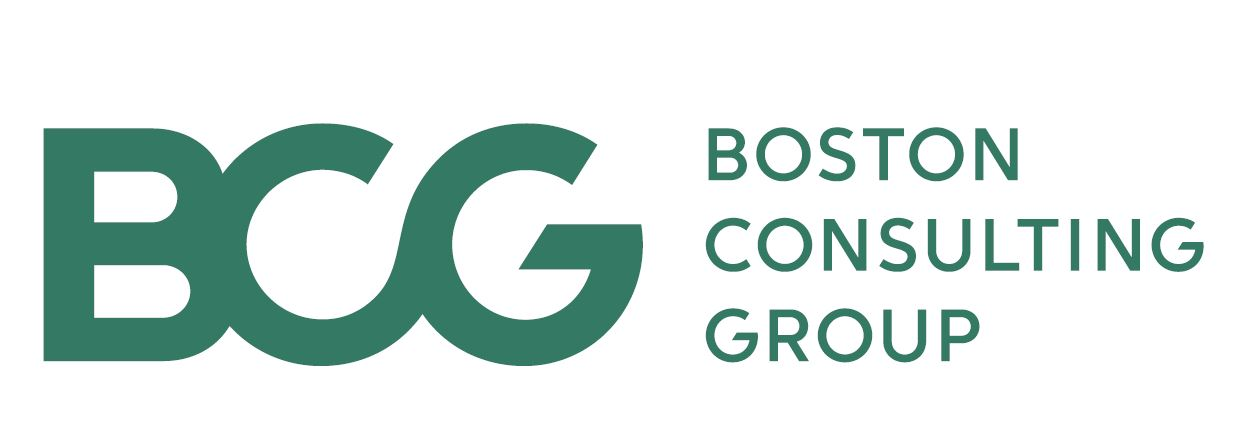

# PowerCo Energy Consumption and Cuatomer Churn Analysis : A Comprehensive Exploratory Data Analysis.

## Importing Necessary Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## Importing Datasets

In [ ]:
data = pd.read_csv('/content/client_data (1).csv')
client_df = pd.DataFrame(data)
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [ ]:
data2 = pd.read_csv('/content/price_data (1).csv')
price_df = pd.DataFrame(data2)
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


# Column Details
## client_data
● id = client company identifier

● activity_new = category of the company’s activity

● channel_sales = code of the sales channel

● cons_12m = electricity consumption of the past 12 months

● cons_gas_12m = gas consumption of the past 12 months

● cons_last_month = electricity consumption of the last month

● date_activ = date of activation of the contract

● date_end = registered date of the end of the contract

● date_modif_prod = date of the last modification of the product

● date_renewal = date of the next contract renewal

● forecast_cons_12m = forecasted electricity consumption for next 12 months

● forecast_cons_year = forecasted electricity consumption for the next calendar year

● forecast_discount_energy = forecasted value of current discount

● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

● has_gas = indicated if client is also a gas client

● imp_cons = current paid consumption

● margin_gross_pow_ele = gross margin on power subscription

● margin_net_pow_ele = net margin on power subscription

● nb_prod_act = number of active products and services

● net_margin = total net margin

● num_years_antig = antiquity of the client (in number of years)

● origin_up = code of the electricity campaign the customer first subscribed to

● pow_max = subscribed power

● churn = has the client churned over the next 3 months

## price_data.csv

● id = client company identifier

● price_date = reference date

● price_off_peak_var = price of energy for the 1st period (off peak)

● price_peak_var = price of energy for the 2nd period (peak)

● price_mid_peak_var = price of energy for the 3rd period (mid peak)

● price_off_peak_fix = price of power for the 1st period (off peak)

● price_peak_fix = price of power for the 2nd period (peak)

● price_mid_peak_fix = price of power for the 3rd period (mid peak)

# Exploratory Data Analysis

In [ ]:
print("Client DataFrame Info:")
client_df.info()
print("\nPrice DataFrame Info:")
price_df.info()

Client DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_

As we can notice not all datatime related columns are not currently in datetime format. we need to convert them later for further analysis.

In [ ]:
print("Client DataFrame Shape:")
client_df.shape

Client DataFrame Shape:


(14606, 26)

In [ ]:
print("\nPrice DataFrame Shape:")
price_df.shape


Price DataFrame Shape:


(193002, 8)

In [ ]:
print("Client DataFrame Null Values:")
client_df.isnull().sum()

Client DataFrame Null Values:


,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


In [ ]:
print("Price DataFrame Null Values:")
price_df.isnull().sum()

Price DataFrame Null Values:


,0
id,0
price_date,0
price_off_peak_var,0
price_peak_var,0
price_mid_peak_var,0
price_off_peak_fix,0
price_peak_fix,0
price_mid_peak_fix,0


As we can see there are no missing values in both the datasets.

# Statistics
Lets have a look at some statistice about both the datasets.

In [ ]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


## Consumption:

**Annual Consumption**: The average annual consumption stands at approximately 159,220 kWh, with a wide range from 0 to over 6.2 million kWh.

**Gas Consumption**: The mean gas consumption is notably lower, averaging around 28,092 kWh annually.

**Monthly Consumption**: The average consumption in the last month is approximately 16,090 kWh, with a range from 0 to over 771,000 kWh.
## Forecasts and Discounts:

**Forecasted Consumption**: The forecasted annual and yearly consumptions have lower averages, indicating potential discrepancies between forecasts and actual consumption.

**Discounts and Prices**: Forecasted energy discounts average at around 0.97, with varied forecasted prices for energy and power, showing deviations.
## Financial Metrics:

**Important Consumption and Margins**: The important consumption value ranges from 0 to over 15,000, while both gross and net power margins average around 24.
Net Margin: The average net margin is approximately 189, with a wide range up to over 24,500.
## Customer Attributes:

**Product and Antiquity**: On average, customers have around 1.29 active products, and the average number of years since the first contract is nearly 5.
Power Attributes and Churn:

**Maximum Power**: The average maximum power is approximately 18 kW, with a range from 3.3 kW to 320 kW.

**Churn Rate**: The churn rate averages around 9.7%, indicating a relatively low rate of customer turnover.

In [ ]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


## Insights from Pricing Data Statistics:
### Variable Pricing:

1. Off-peak hours: Mean ≈ 0.141, Range: 0 to 0.281.

2. Peak hours: Mean ≈ 0.055, Range: 0 to 0.230.
3. Mid-peak hours: Mean ≈ 0.030, Range: 0 to 0.114.

### Fixed Pricing:

1. Off-peak hours: Range from 0 to 59.445.
2. Peak hours: Range from 0 to 36.491.
3. Mid-peak hours: Range from 0 to 17.458.

### Distribution Insights:

1. Wide variability in fixed prices during off-peak hours compared to peak and mid-peak.
2. Majority of observations in peak and mid-peak hours fall below 25% of their respective ranges.

These insights highlight the variation in pricing across different time periods and the dominance of fixed prices in off-peak hours, suggesting potential strategies for pricing optimization or cost management.

In [ ]:
# Converting wrong data type columns to datetime

dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for date in dates:
    client_df[date] = pd.to_datetime(client_df[date], errors='coerce')

In [ ]:
client_df.dtypes

,0
id,object
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,datetime64[ns]
date_end,datetime64[ns]
date_modif_prod,datetime64[ns]
date_renewal,datetime64[ns]
forecast_cons_12m,float64


In [ ]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], errors='coerce')

In [ ]:
price_df.dtypes

,0
id,object
price_date,datetime64[ns]
price_off_peak_var,float64
price_peak_var,float64
price_mid_peak_var,float64
price_off_peak_fix,float64
price_peak_fix,float64
price_mid_peak_fix,float64


In [ ]:
price_df['id'].value_counts().value_counts()

,count
count,
12,15990
11,83
10,11
9,6
8,3
7,3


In [ ]:
price_df['price_date'].value_counts()

,count
price_date,
2015-12-01,16094
2015-08-01,16094
2015-07-01,16090
2015-11-01,16087
2015-10-01,16085
2015-06-01,16085
2015-09-01,16082
2015-02-01,16082
2015-05-01,16080


# Data Visualization

In [ ]:
def plot_stacked_bars(dataframe, title_, size_=(16, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

In [ ]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

# Churn

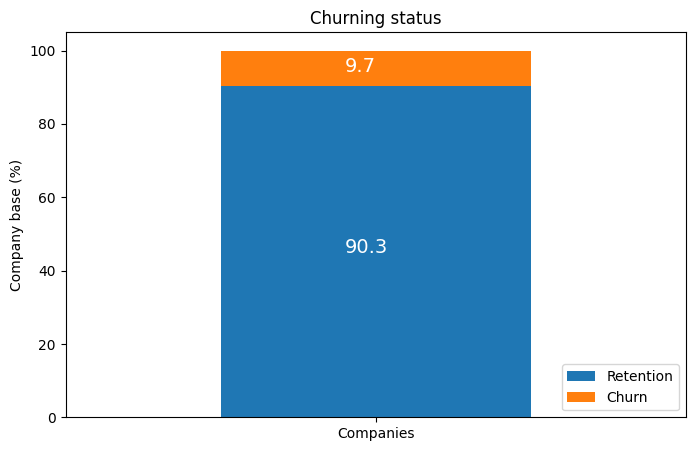


 ----- Value Counts -----

churn
0    13187
1     1419
Name: count, dtype: int64


In [ ]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (8, 5), legend_="lower right")
print("\n ----- Value Counts -----\n")
print(client_df['churn'].value_counts())

### Insight: Nearly 10% (9.7%) of the customers have churned and 90% of the customers have not churned.

In [ ]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis = 1), axis = 0)* 100).sort_values(by=[1], ascending=False)

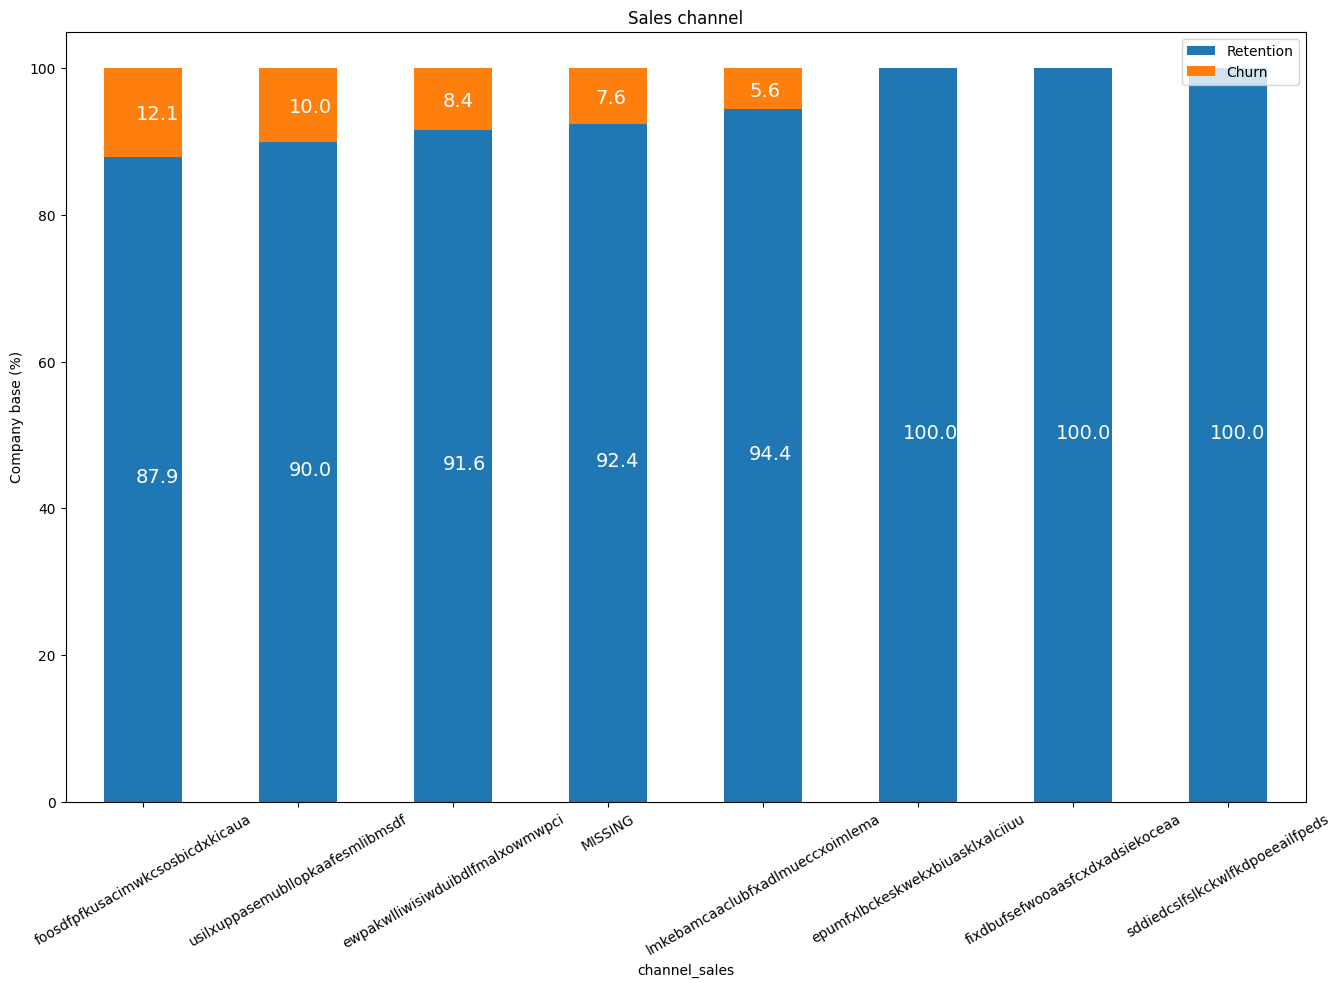

In [ ]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

### Interestingly, the churning customers are distributed over 5 different values for channel_sales. As well as this, the value of MISSING has a churn rate of 7.6%. MISSING indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

# Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [ ]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month','imp_cons', 'has_gas', 'churn']]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


In [ ]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

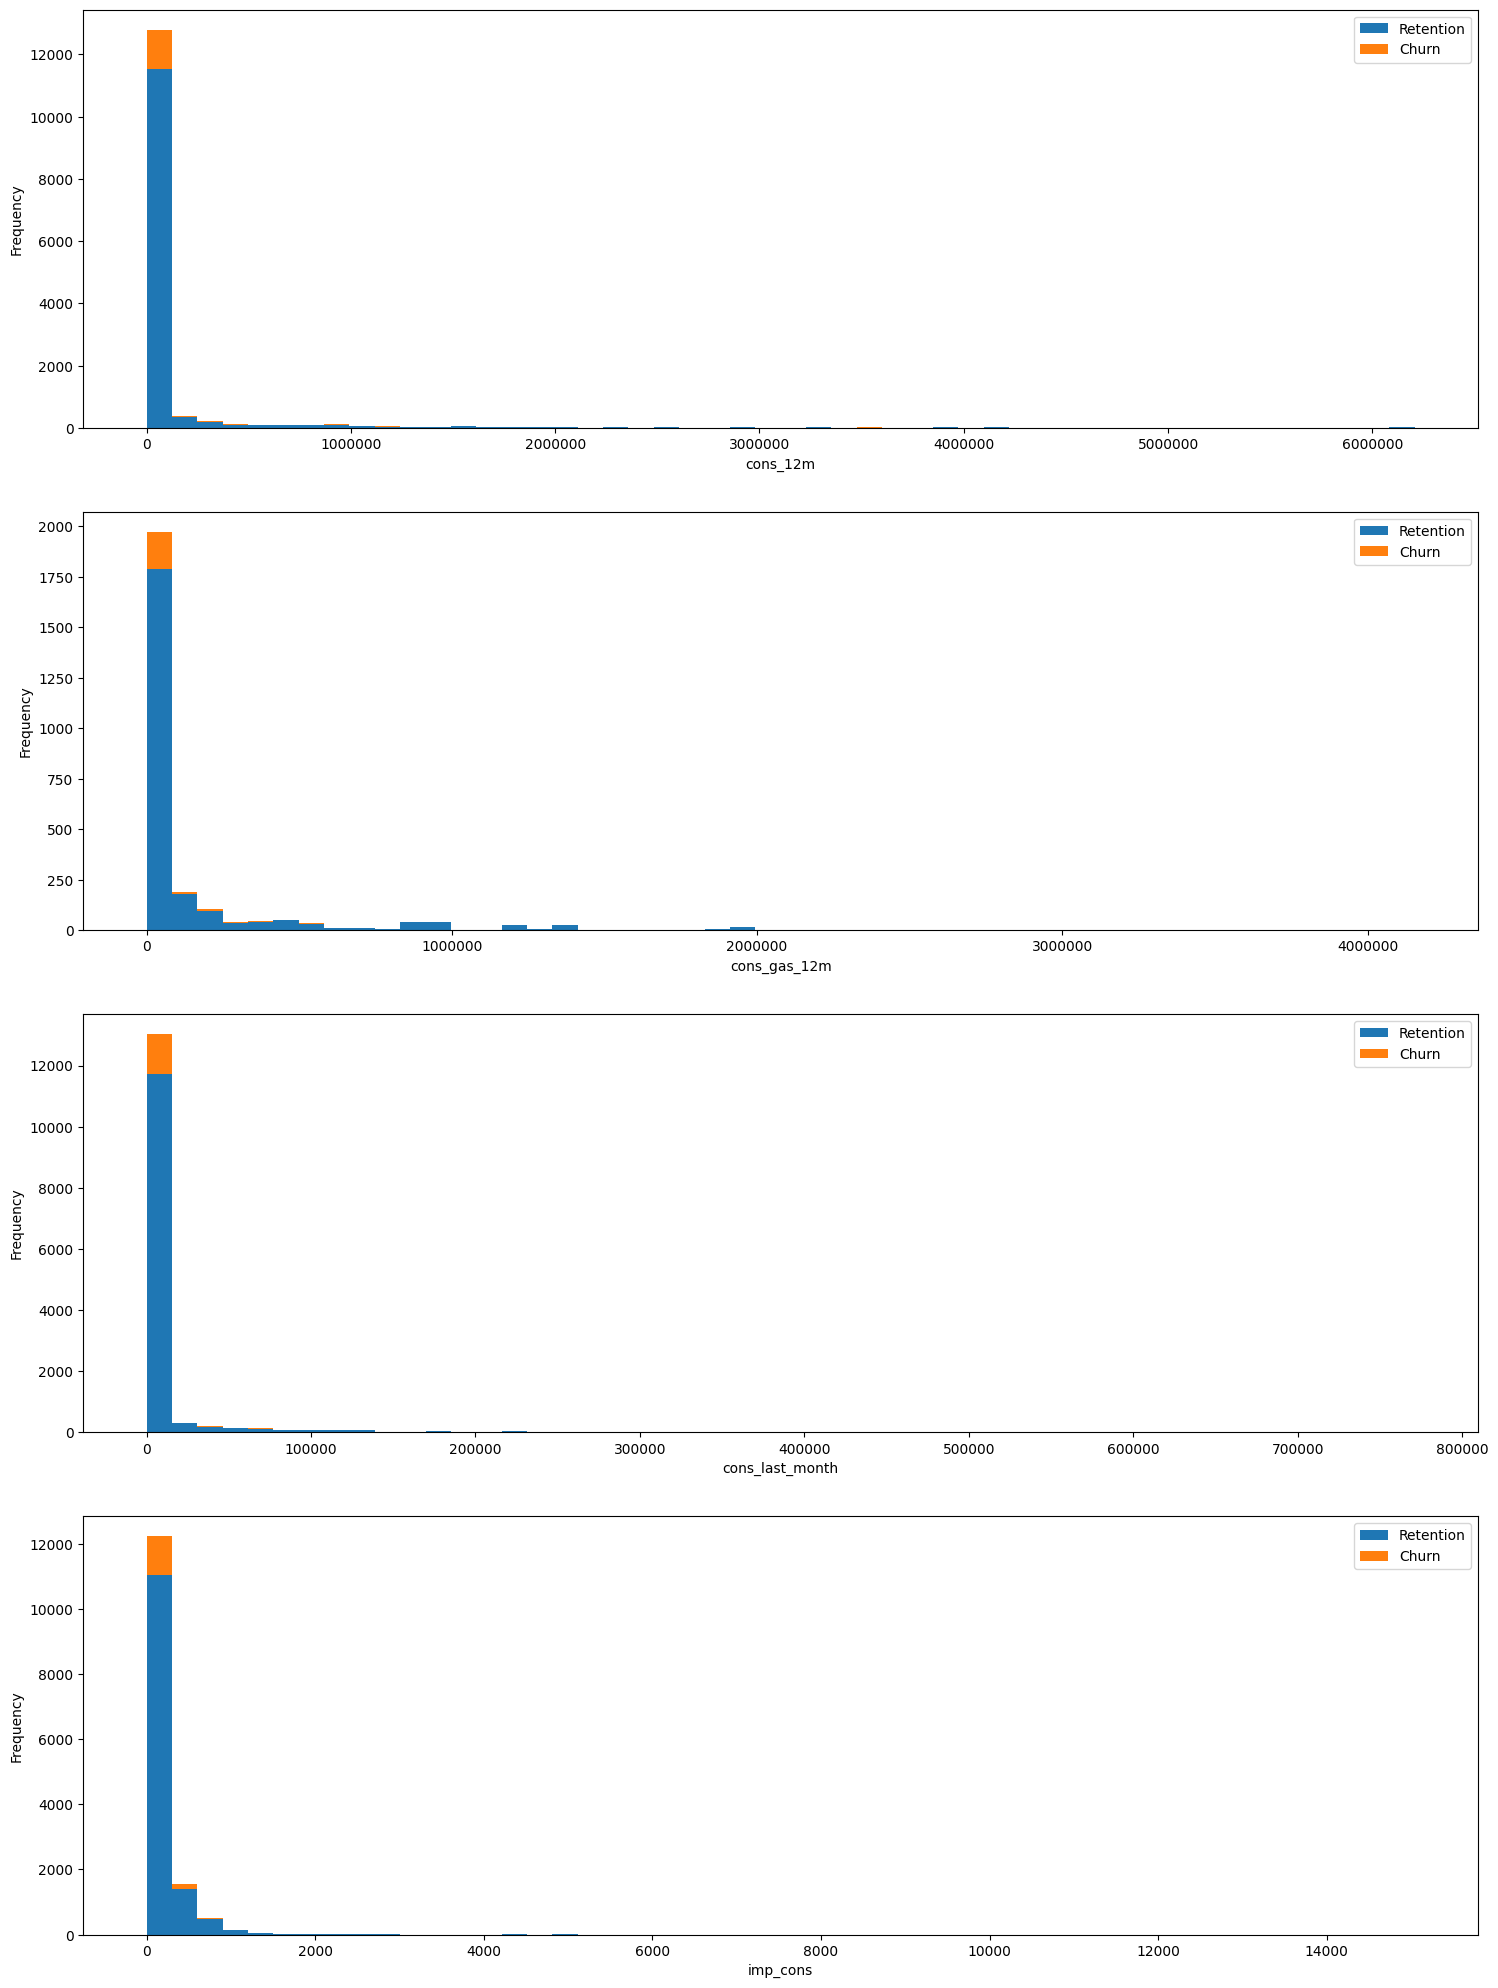

In [ ]:
fig,axs = plt.subplots(nrows=4, figsize=(18,25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

plt.savefig("Distribution of the consumption.png", bbox_inches="tight")

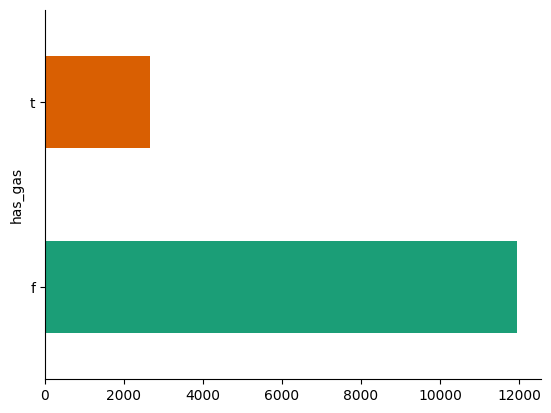

In [ ]:
consumption.groupby('has_gas').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

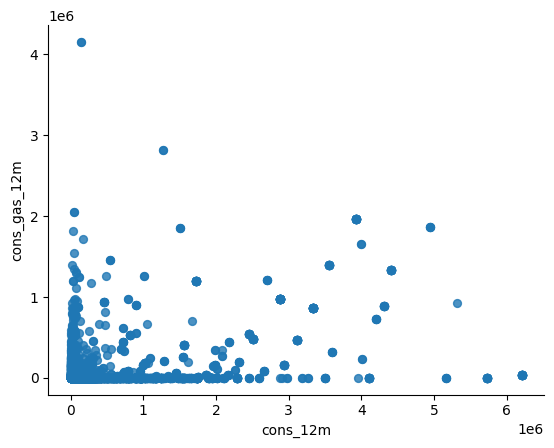

In [ ]:
consumption.plot(kind='scatter', x='cons_12m', y='cons_gas_12m', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

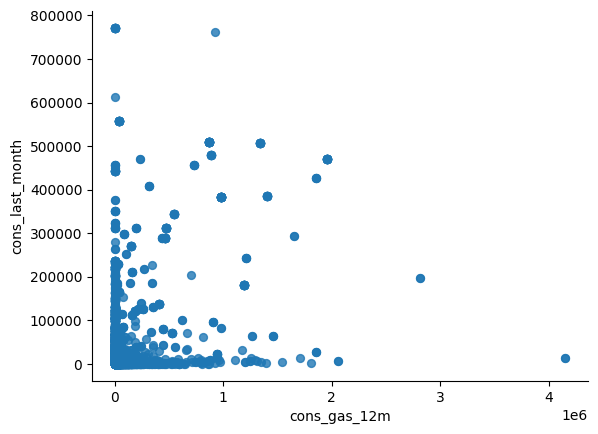

In [ ]:
# cons_gas_12m vs cons_last_month
consumption.plot(kind='scatter', x='cons_gas_12m', y='cons_last_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

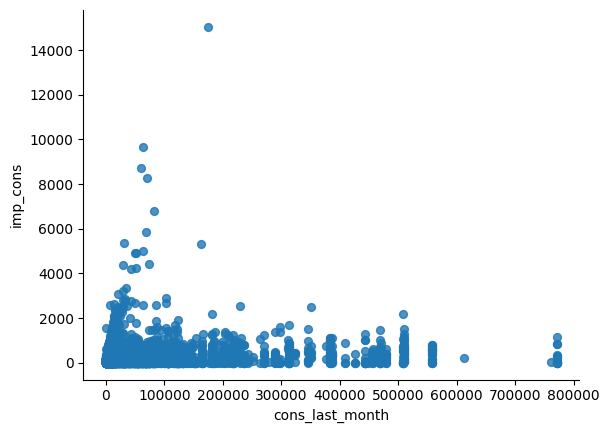

In [ ]:
# cons_last_month vs imp_cons

consumption.plot(kind='scatter', x='cons_last_month', y='imp_cons', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The consumption data is clearly significantly positively skewed and has a very long right tail toward the upper values of the distribution. Outliers are most likely to be found in the values at the upper and lower ends of the distribution. To see the outliers more clearly, we might employ a common plot. A boxplot is a common visual representation of the distribution using a five-number summary as the basis:

  ♦ Minimum

  ♦ First quartile (Q1)

  ♦ Median

  ♦ Third quartile (Q3)

  ♦ Maximum

  It can uncover anomalies and their values. Additionally, it can reveal the degree to which our data is grouped, symmetrical, and skewed.

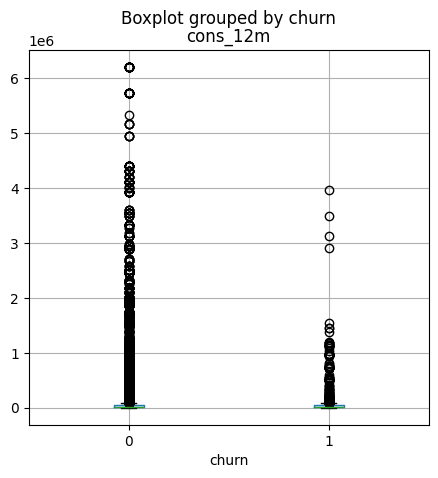

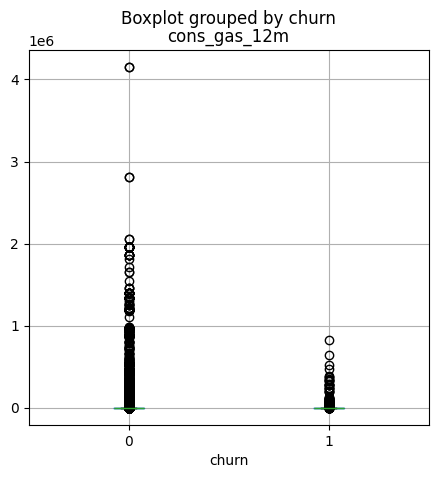

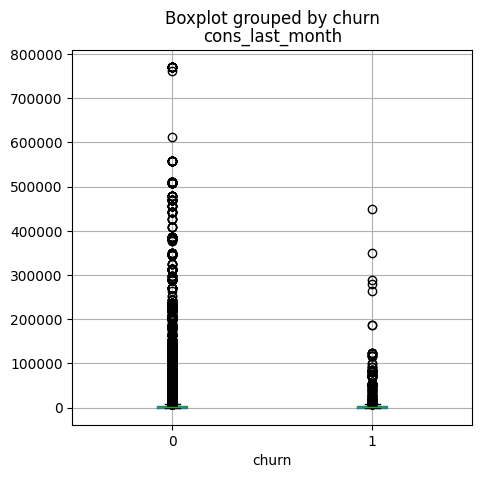

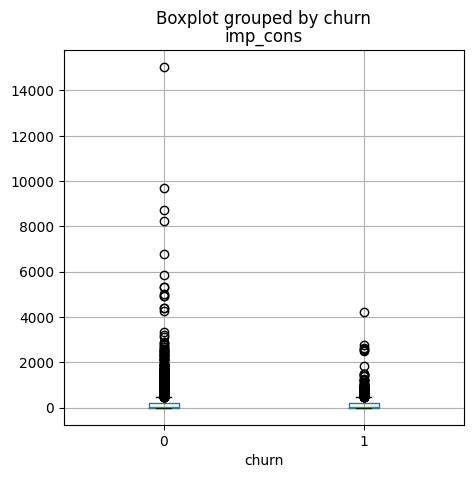

In [ ]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]
for col in consumption:
  client_df.boxplot(column=col, by = 'churn', figsize=(5,5))
  plt.title(col)
  plt.show()



# Forecast

In [ ]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [ ]:
forecast = [['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak']]

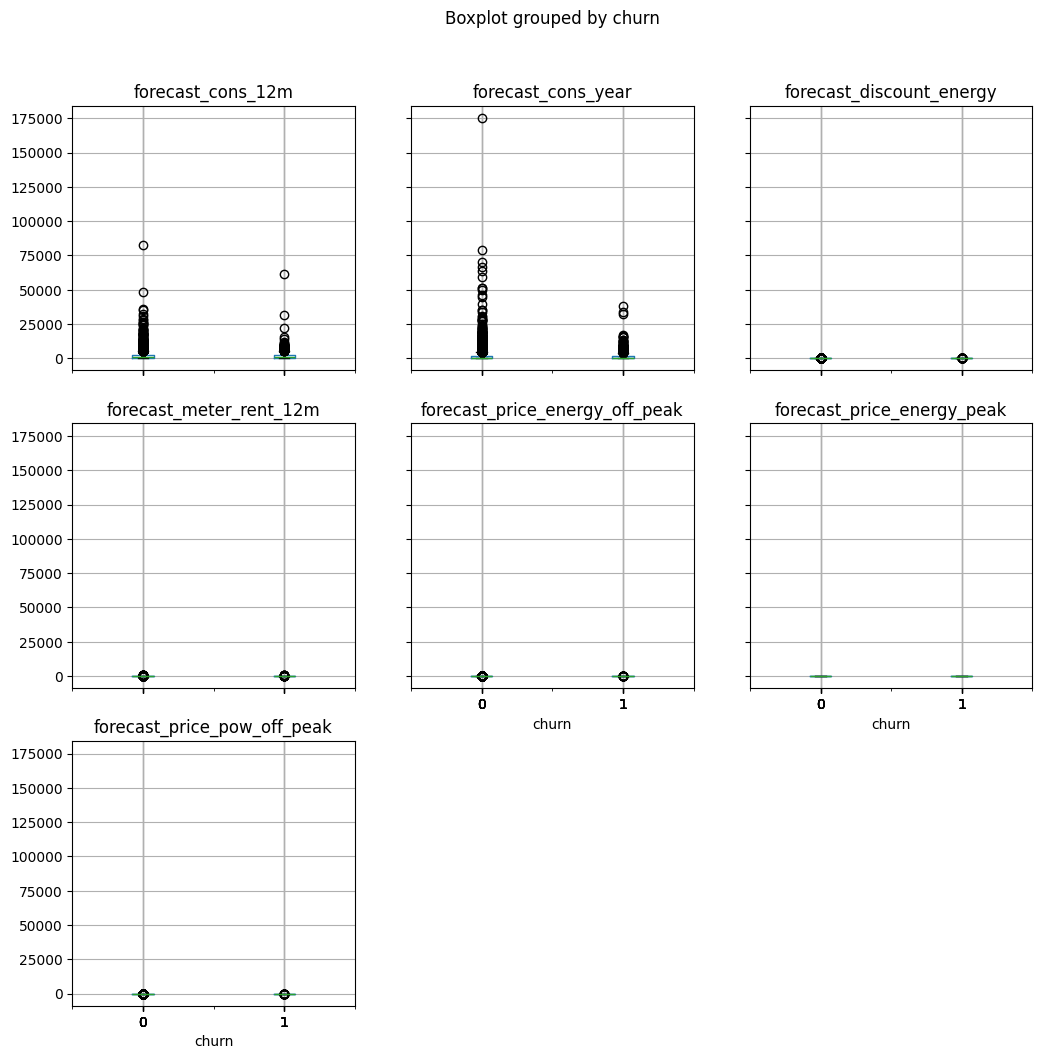

In [ ]:
for col in forecast:
  client_df.boxplot(column=col, by= 'churn', figsize=(12,12))
  plt.title(col)
plt.show()

## Further process we will address the skewness and outliers

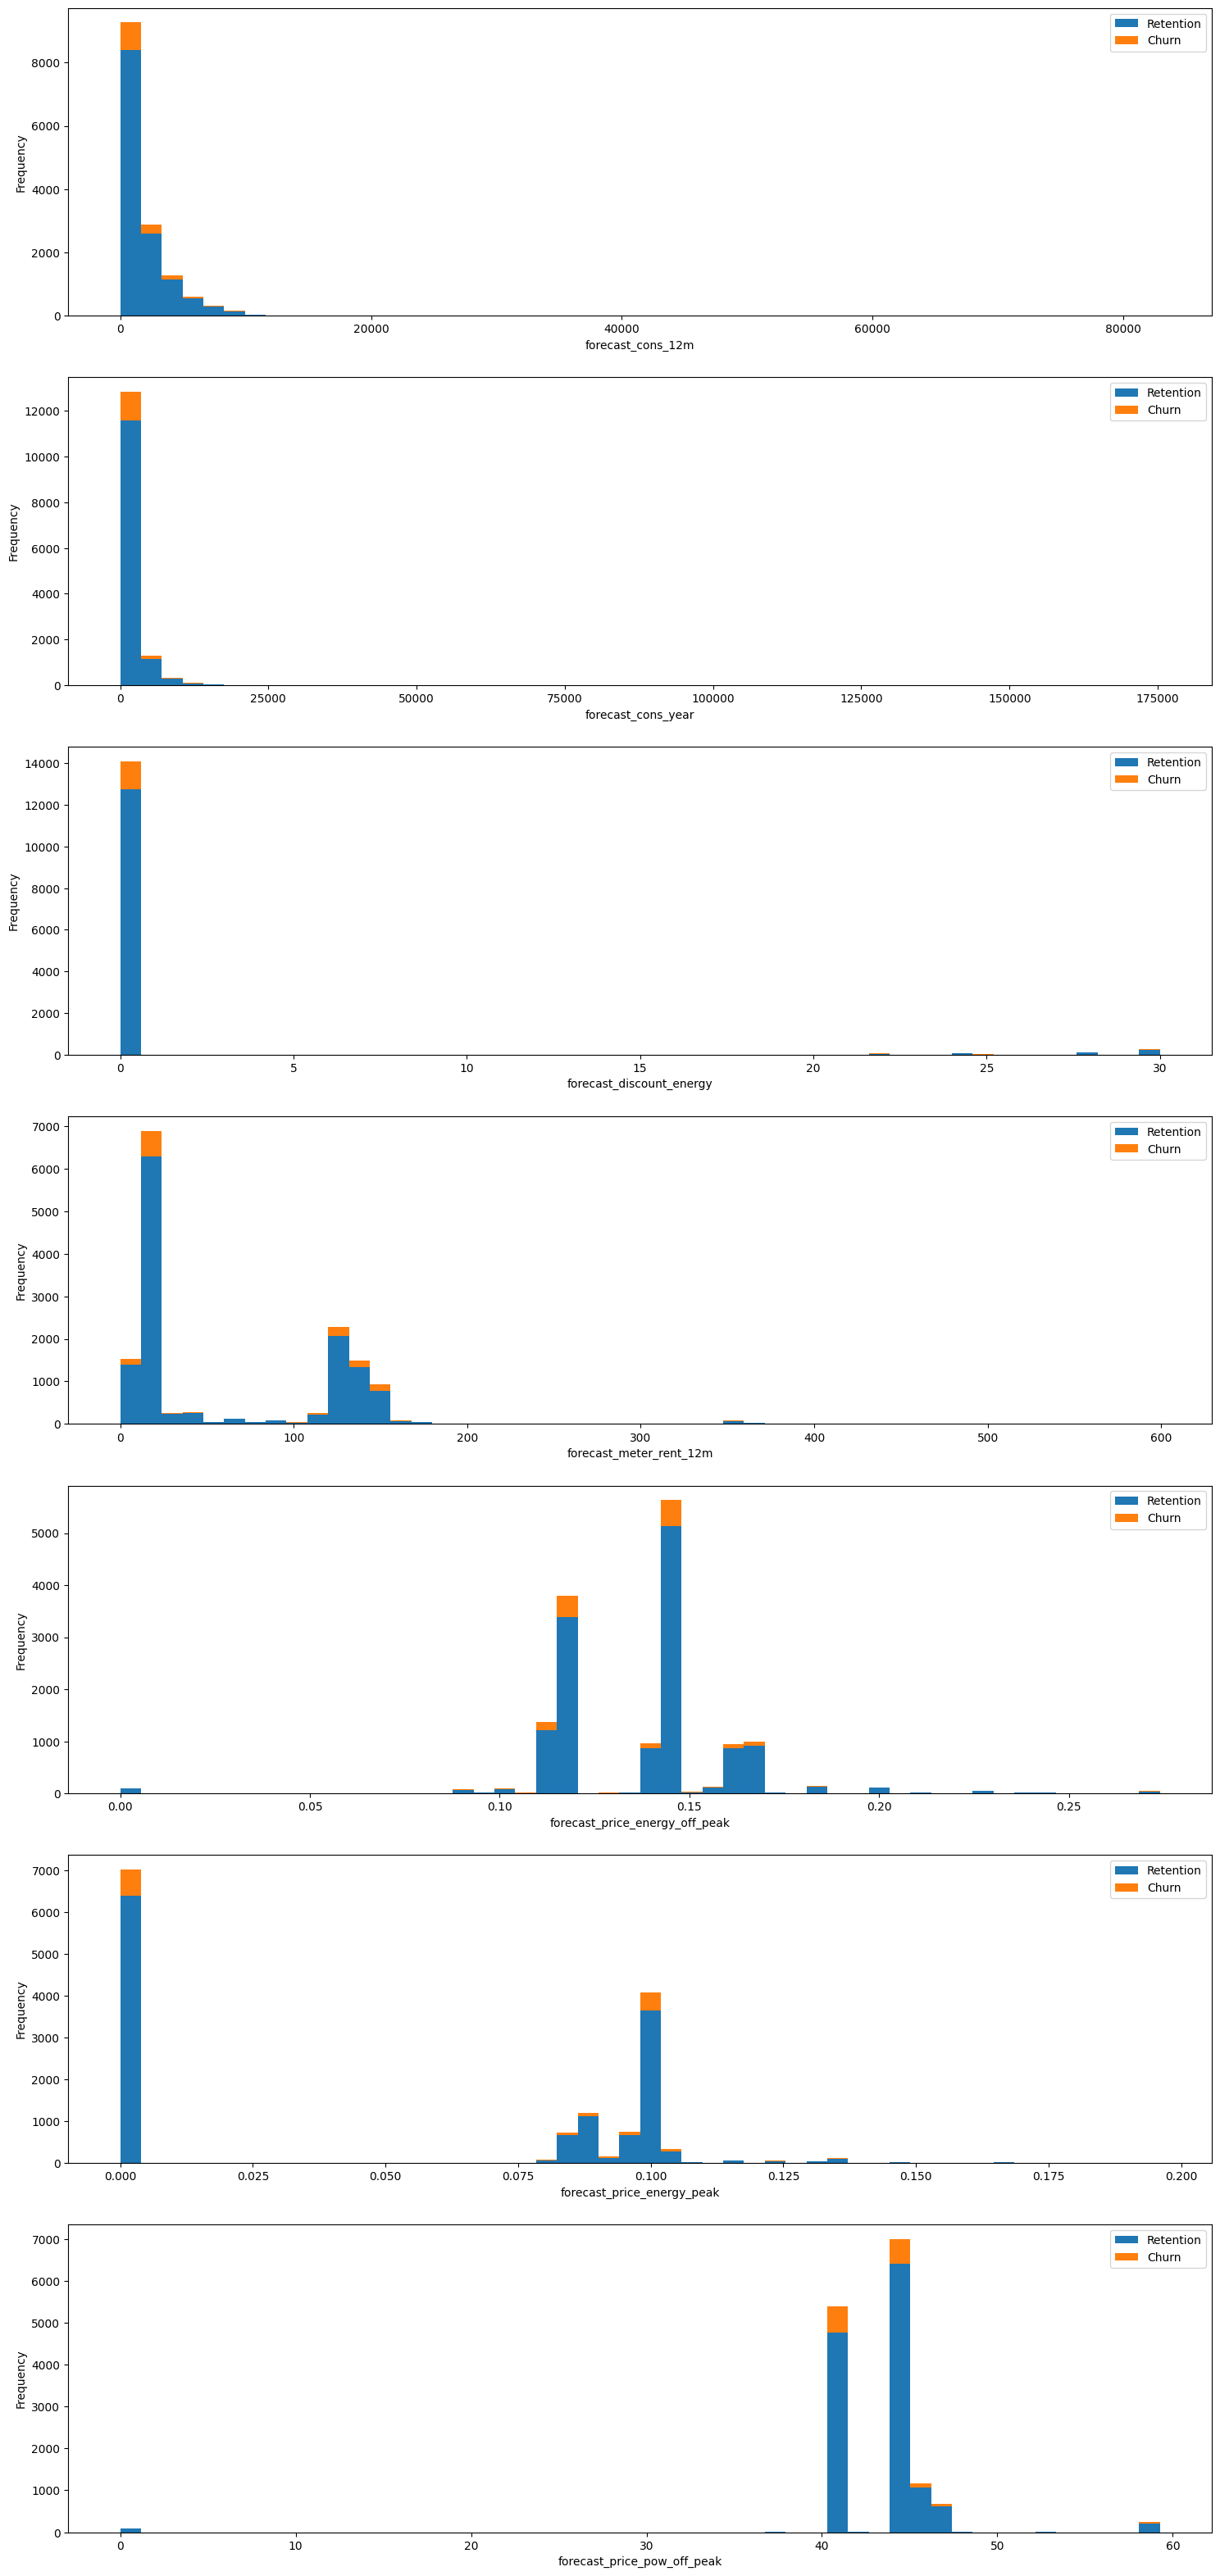

In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,40))
plot_distribution(client_df, 'forecast_cons_12m', axs[0])
plot_distribution(client_df, 'forecast_cons_year', axs[1])
plot_distribution(client_df, 'forecast_discount_energy', axs[2])
plot_distribution(client_df, 'forecast_meter_rent_12m', axs[3])
plot_distribution(client_df, 'forecast_price_energy_off_peak', axs[4])
plot_distribution(client_df, 'forecast_price_energy_peak', axs[5])
plot_distribution(client_df, 'forecast_price_pow_off_peak', axs[6])

Several variables exhibit significant positive skewness, resembling the distribution seen in the consumption plots. This long tail of high values needs to be addressed to ensure the robustness of subsequent analyses.

# Contract Type

In [ ]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)* 100).sort_values(by=[1], ascending=False)

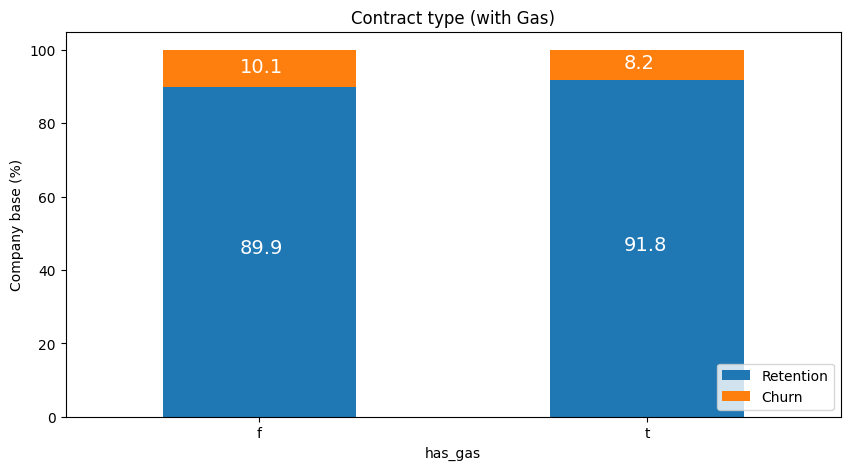

In [ ]:
plot_stacked_bars(contract_percentage, 'Contract type (with Gas)', (10, 5), legend_="lower right")

# Margin

In [ ]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
margin.head()

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89
2,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60
3,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46
4,149d57cf92fc41cf94415803a877cb4b,44.91,44.91,47.98


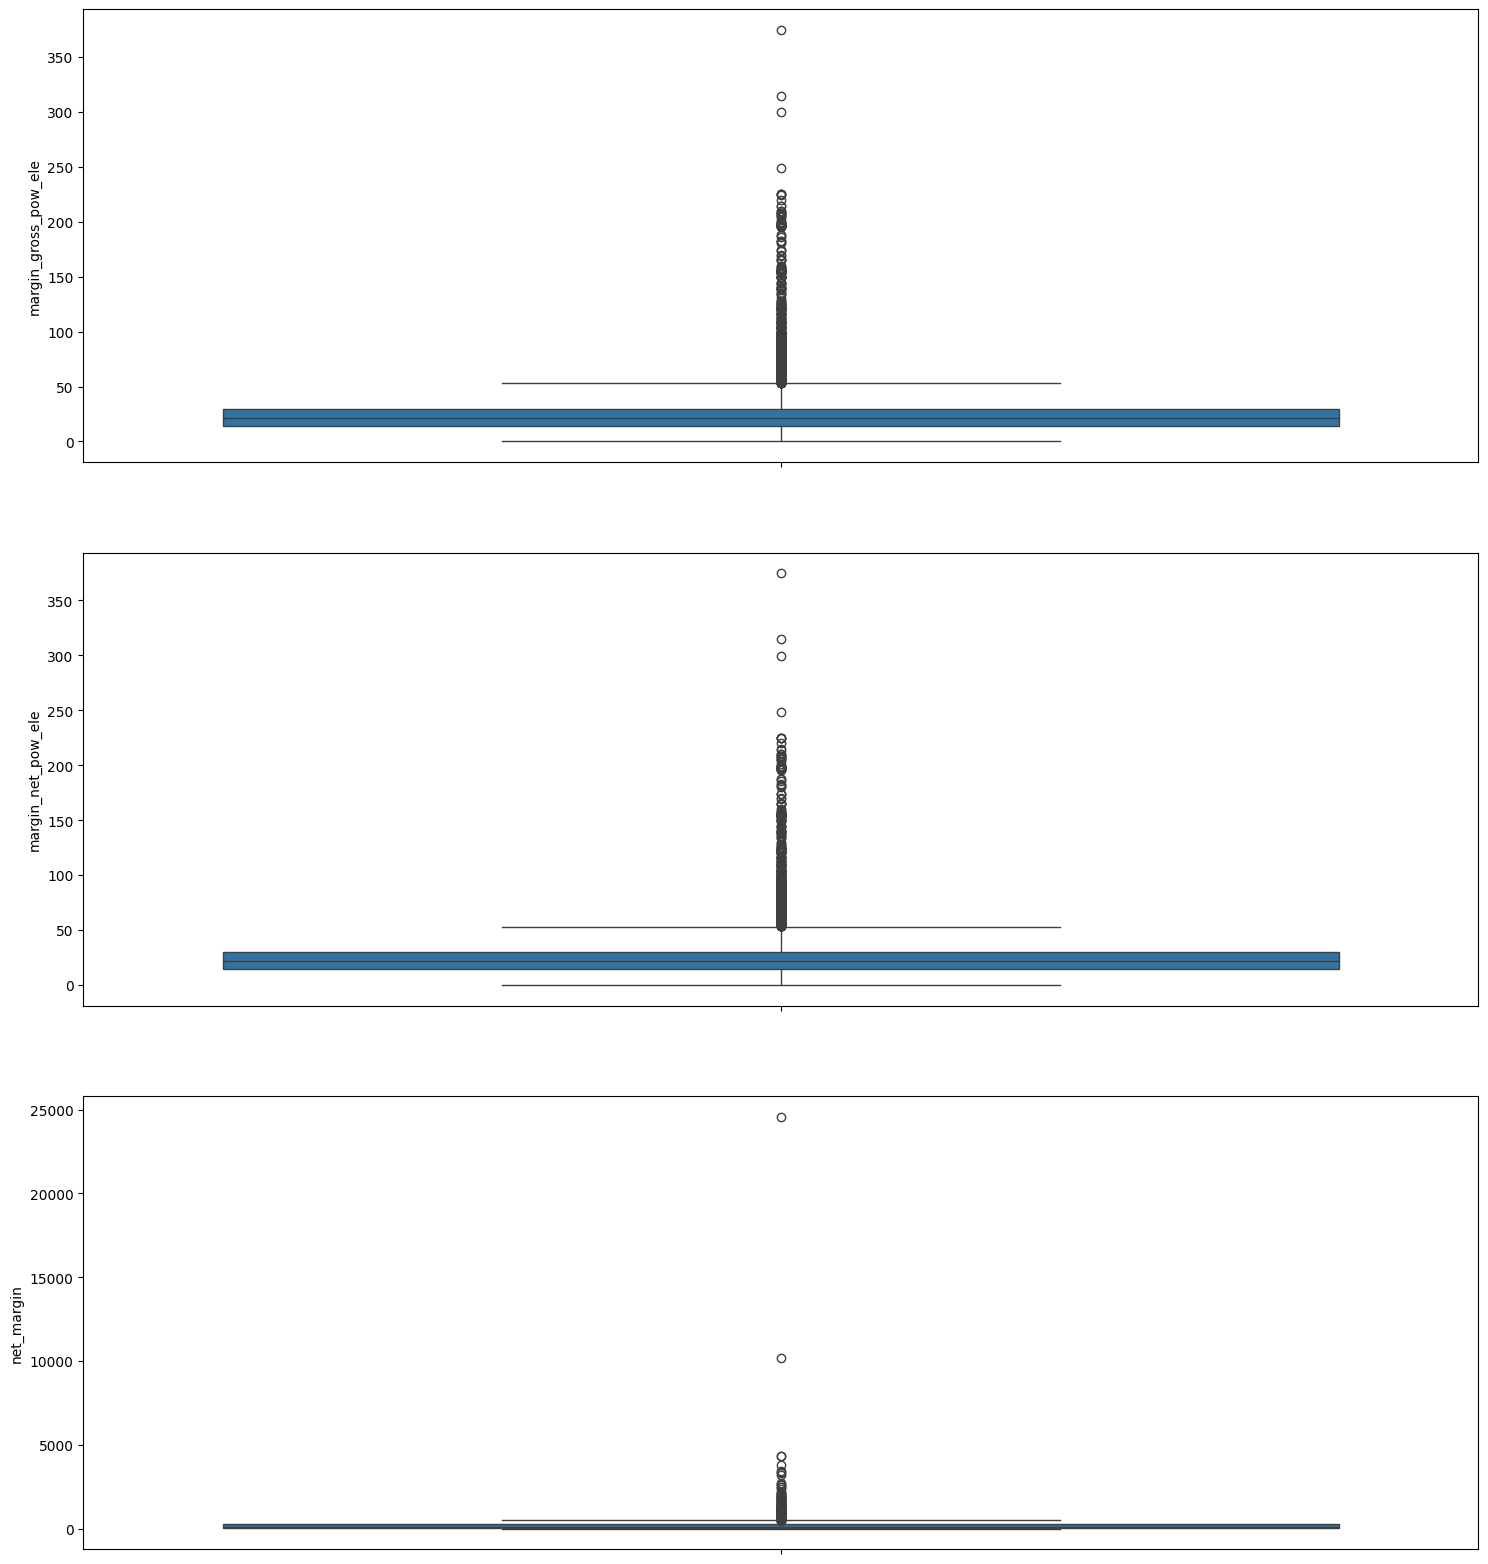

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

plt.savefig("View of Margins.png", bbox_inches="tight")

plt.show()

There are outliers present in the data which will be delt in the further Task

# Subscribed Power

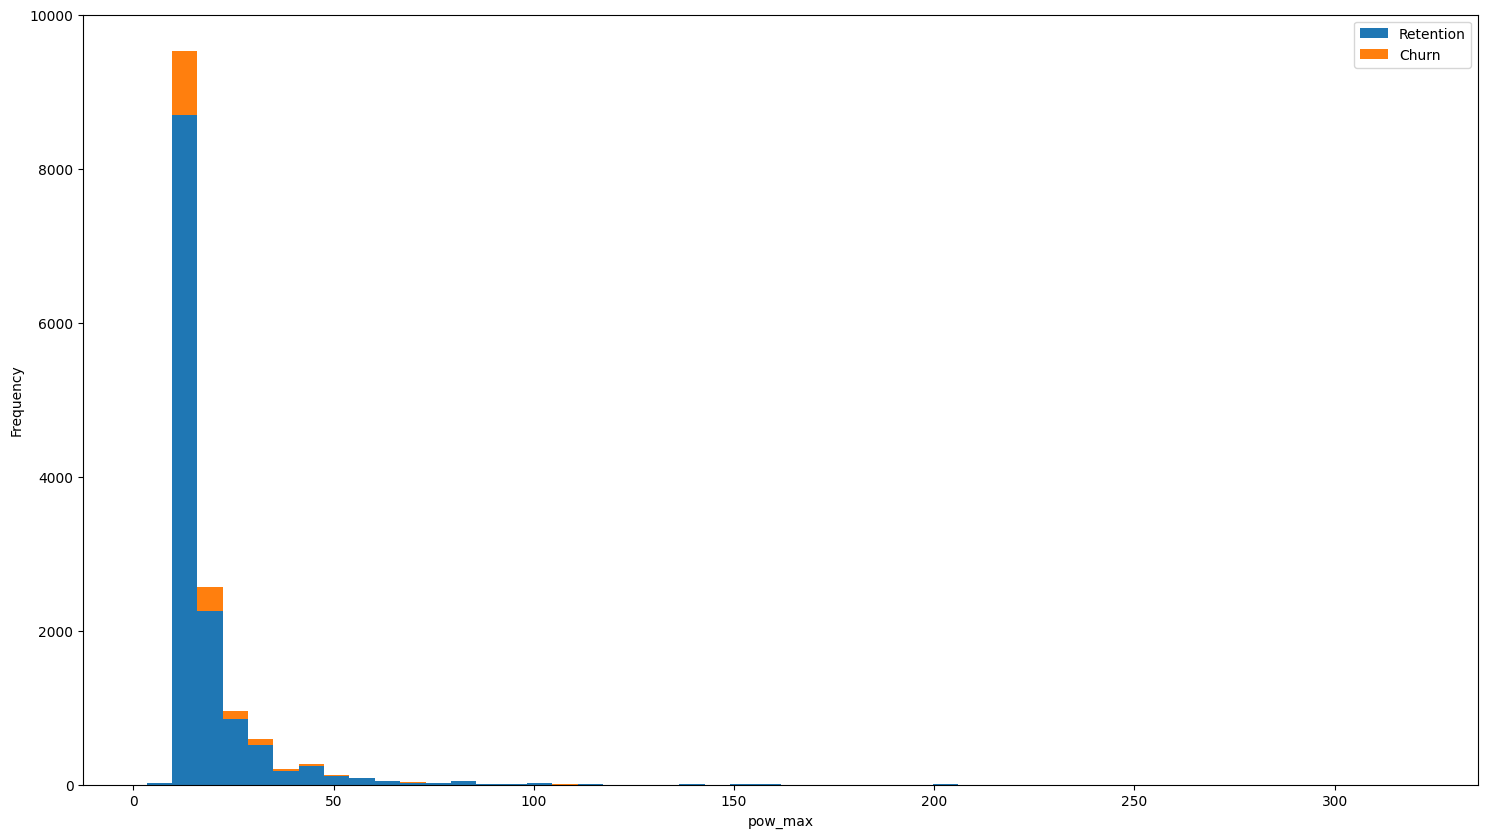

In [ ]:
power = client_df[['id', 'pow_max', 'churn']]

fig,axs=plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, 'pow_max', axs)

plt.savefig("view of subscribed power.png", bbox_inches="tight")

# Other Columns

In [ ]:
other_cols = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

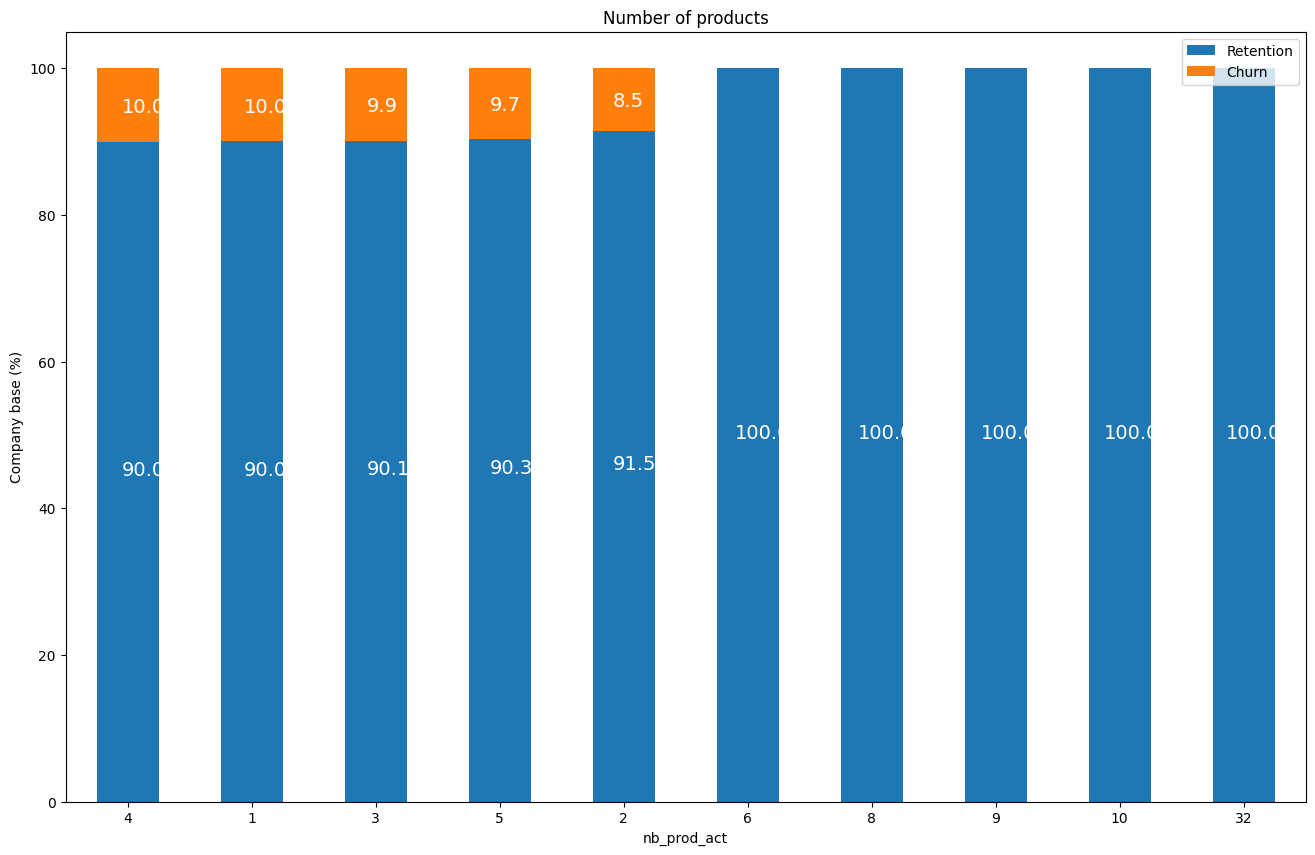

In [ ]:
plot_stacked_bars(products_percentage, "Number of products")

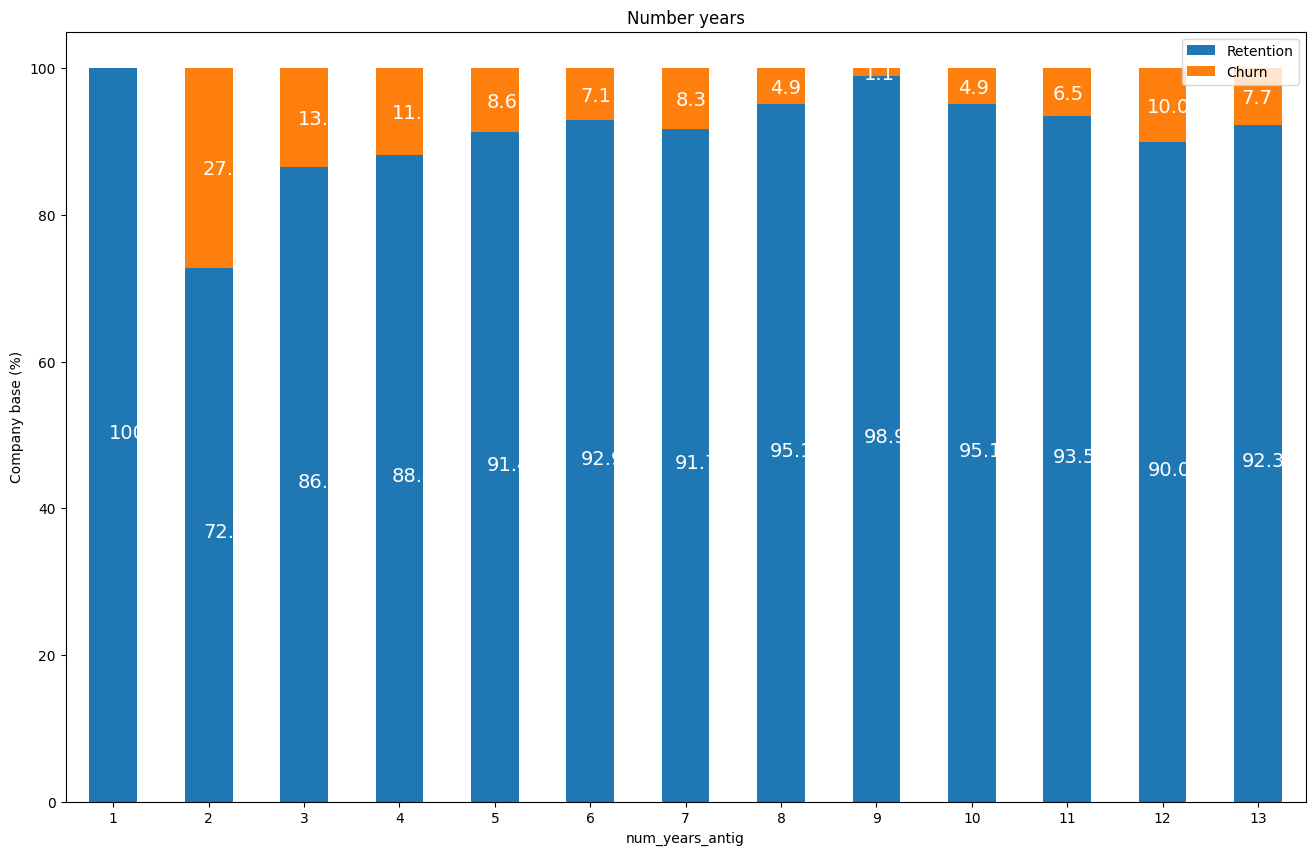

In [ ]:
years_antig = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

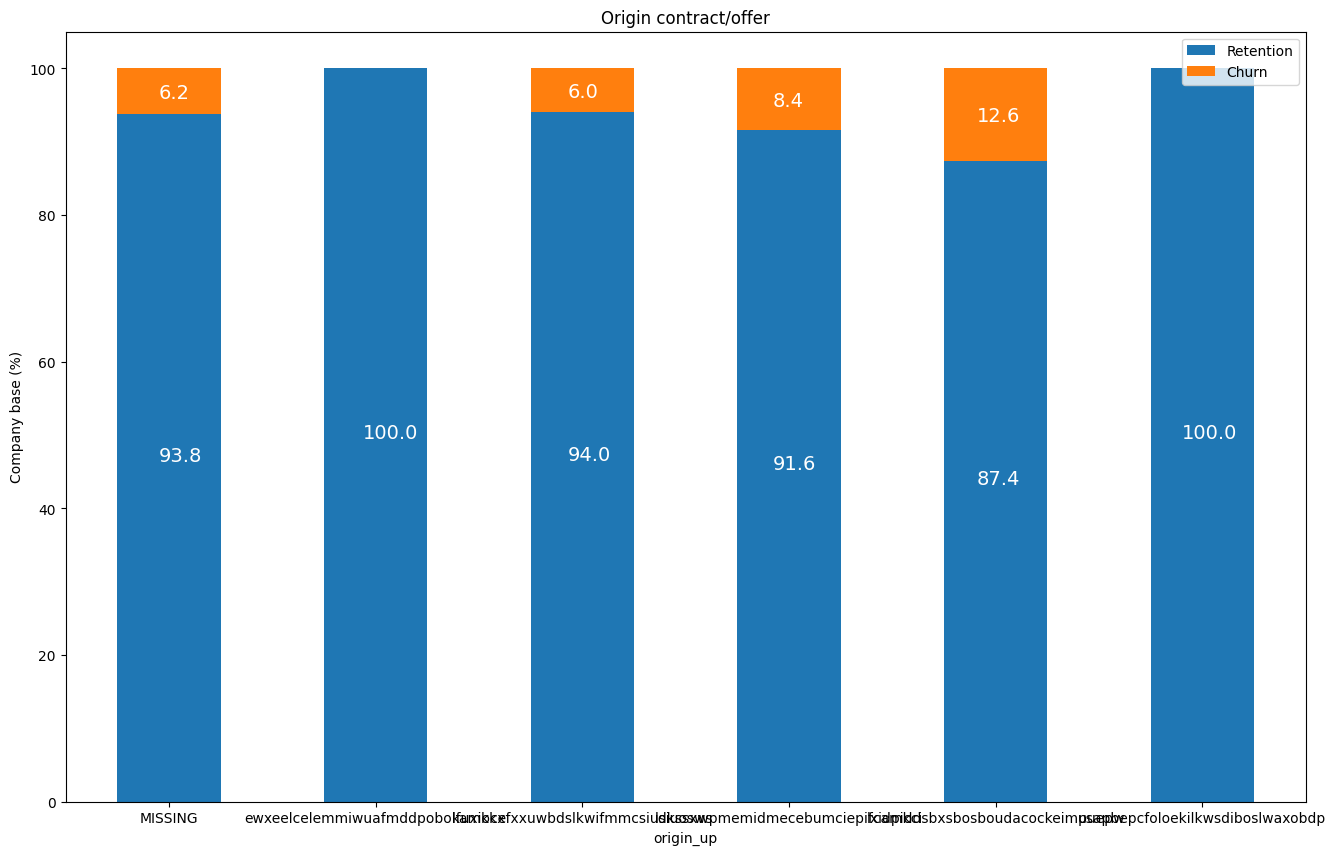

In [ ]:
origin = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

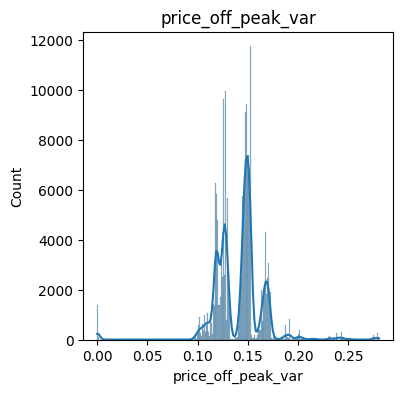

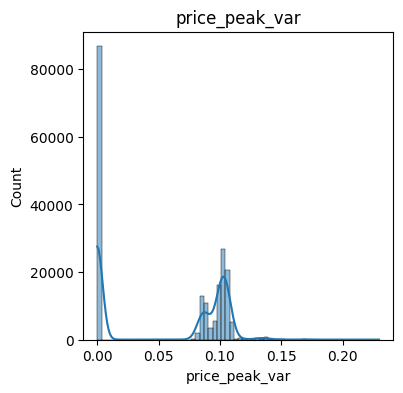

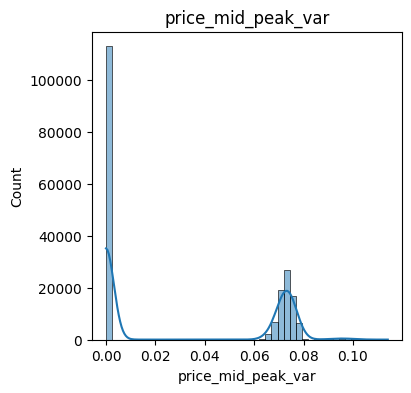

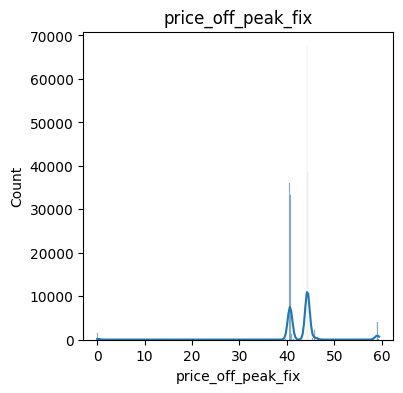

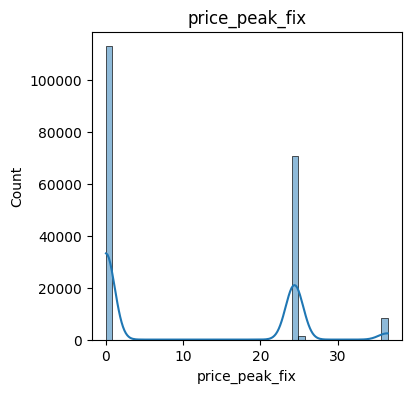

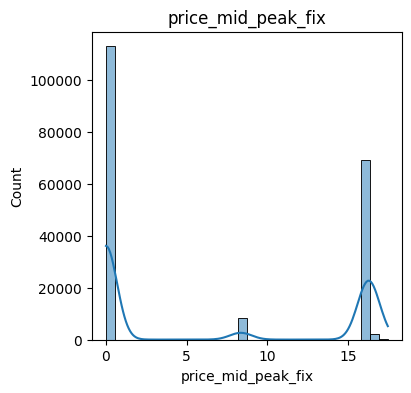

In [ ]:
columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for col in columns:
    plt.figure(figsize = (4,4))
    sns.histplot(data=price_df[col], kde=True)
    plt.title(col)
    plt.show()

To understand the distribution of our price data, I will generate histograms for each price feature. These visualizations will show that the values for each price type tend to cluster around specific points. Upon inspection, it's evident that zero values are frequent in the peak and mid-peak price data, whereas off-peak prices rarely have a value of zero. This observation leads me to conclude that a price sensitivity analysis would be most insightful when based on off-peak prices, as they exhibit a less skewed distribution at the zero mark.

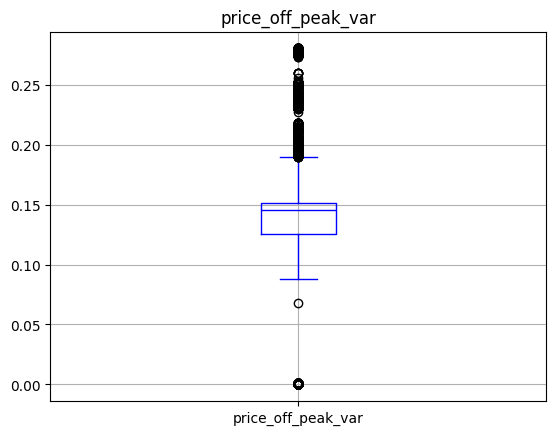

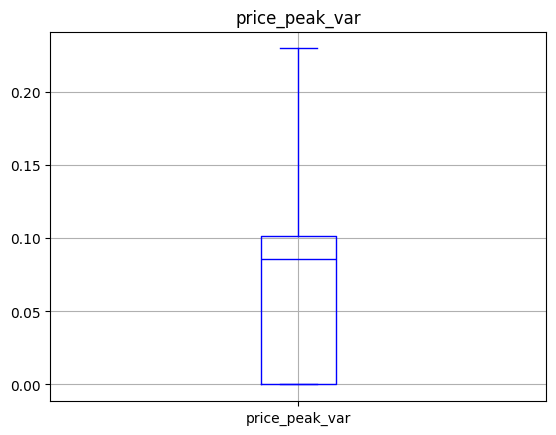

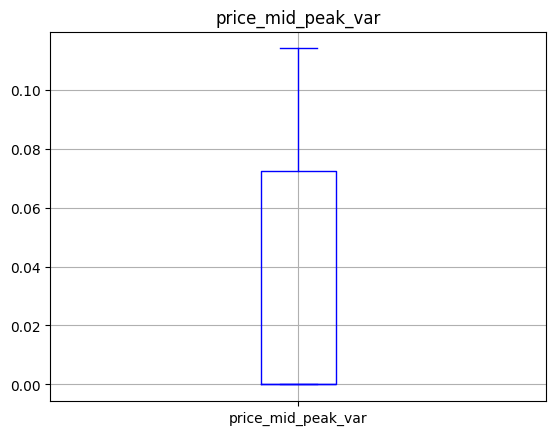

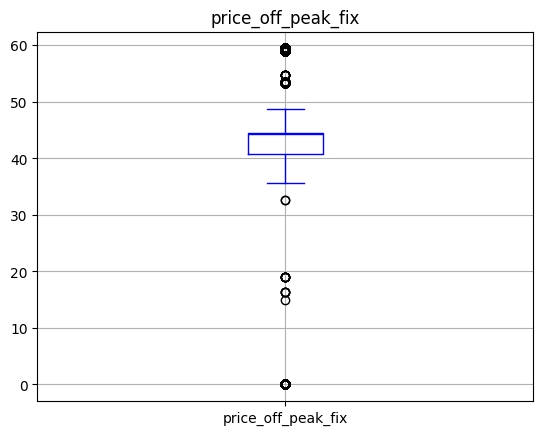

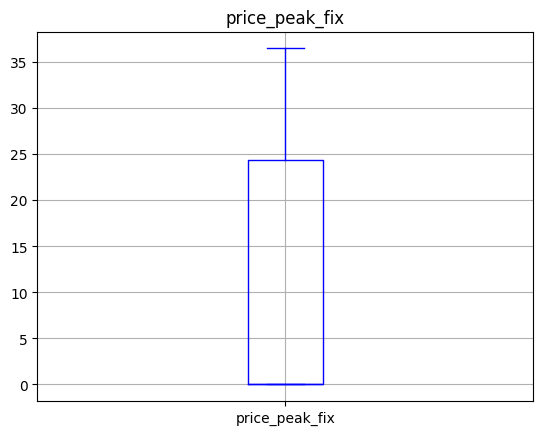

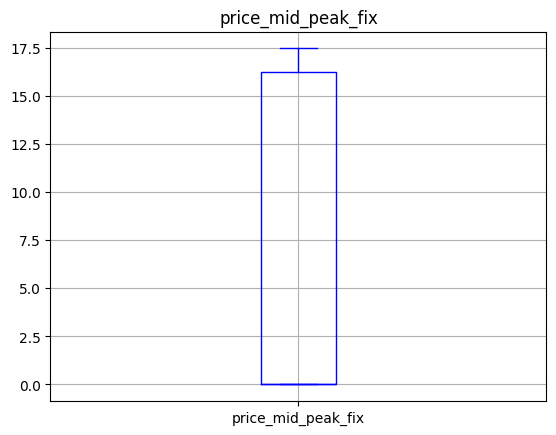

In [ ]:
for col in columns:
  price_df.boxplot(column = col, color = 'blue')
  plt.title(col)
  plt.show()

We can also see that the Price data has outliers which we will address in the upcoming steps

In [ ]:
corr_columns = ['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']
corr = price_df[corr_columns].corr()

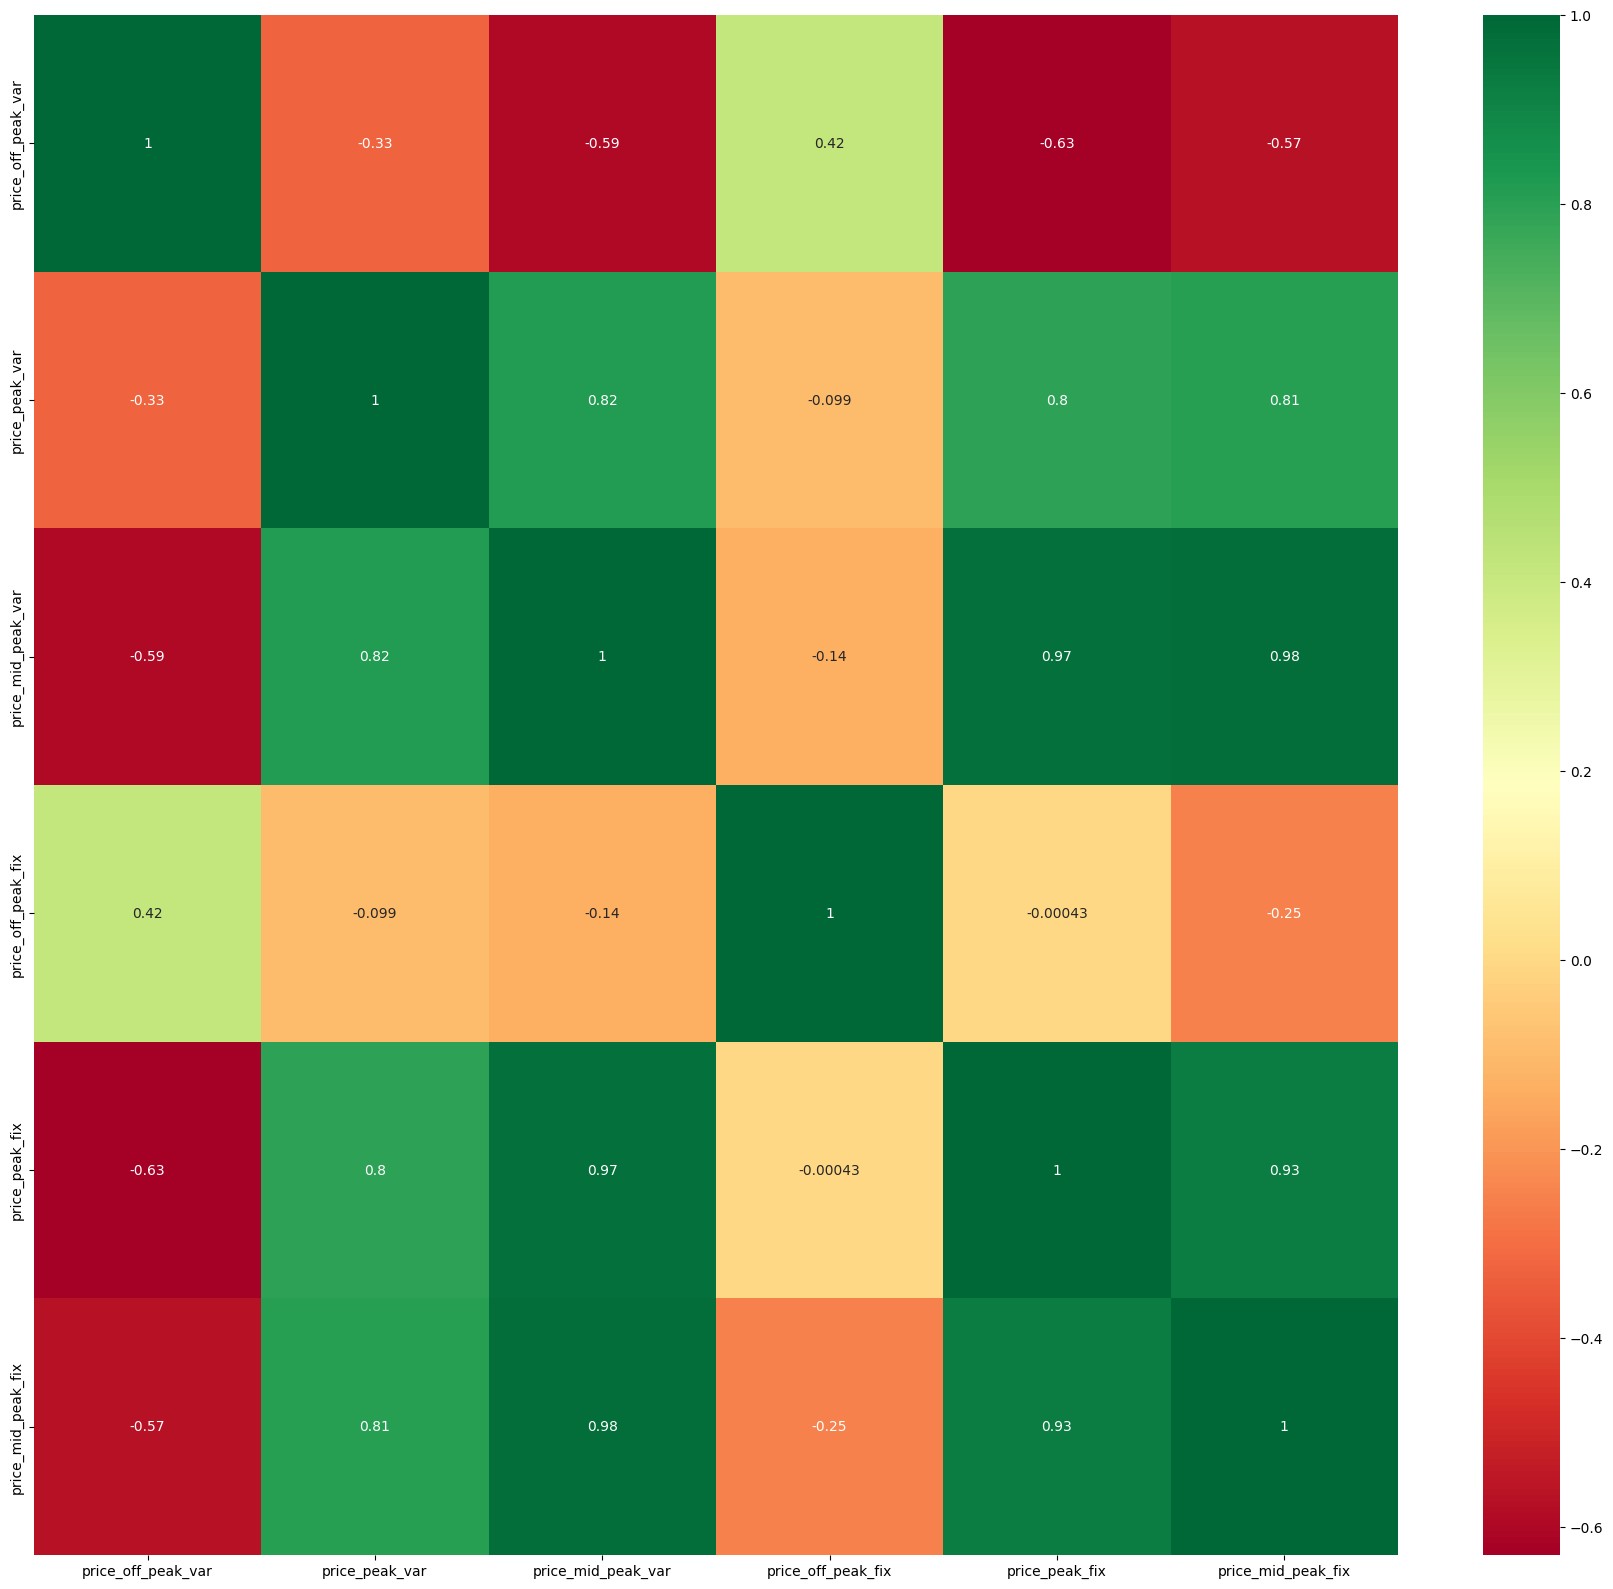

In [ ]:
plt.figure(figsize=(22,20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("View of correalation.png", bbox_inches='tight')
plt.show()

## Correlation Analysis of Electricity Pricing:

**Variable Pricing**:
1. Off-peak and mid-peak prices exhibit a strong negative correlation (-0.595). This suggests that as off-peak prices decrease, mid-peak prices tend to increase significantly, and vice versa.

2. Off-peak and peak prices show a moderate negative correlation (-0.329). There is a less pronounced inverse relationship between off-peak and peak prices compared to the off-peak/mid-peak relationship.

**Fixed Pricing**:
1. Off-peak and peak prices have a strong negative correlation (-0.630). In the fixed pricing structure, the inverse relationship between off-peak and peak prices is more prominent than in variable pricing.

2. Off-peak and mid-peak prices also show a strong negative correlation (-0.572). This indicates a significant inverse relationship between off-peak and mid-peak prices within the fixed pricing structure.

**Variable-Fixed Price Relationship:**
1. A weak positive correlation exists between off-peak variable and fixed prices (0.417). This suggests a slight tendency for off-peak prices to move in the same direction across both pricing structures.

2. There is minimal correlation between peak and mid-peak variable prices and their fixed price counterparts.

## Hypothesis: Customer Price Sensitivity

Our hypothesis is that customers are sensitive to price changes. This sensitivity can be observed when an increase in electricity price leads to customer churn (customers switching providers). Conversely, if customers switch providers when there is no price increase or even a decrease, it is more difficult to attribute their behavior directly to price sensitivity.

## Methodology for Measuring Price Sensitivity:

To test this hypothesis, we will analyze customer consumption data for the year 2015. We will create new features to quantify price sensitivity by examining average consumption over different time periods:

1. Annual Average: Average consumption over the entire year 2015.
2. Last 6 Months Average: Average consumption during the latter half of 2015.
3. Last 3 Months Average: Average consumption during the final quarter of 2015.

By comparing these consumption averages with price changes, we aim to identify patterns that support or refute our hypothesis regarding customer price sensitivity and its impact on churn.

In [ ]:
# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [ ]:
mean_year.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [ ]:
# rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [ ]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [ ]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_6m["mean_year_price_off_peak"] = mean_6m["mean_year_price_off_peak_var"] + mean_6m["mean_year_price_off_peak_fix"]
mean_6m["mean_year_price_peak"] = mean_6m["mean_year_price_peak_var"] + mean_6m["mean_year_price_peak_fix"]
mean_6m["mean_year_price_med_peak"] = mean_6m["mean_year_price_mid_peak_var"] + mean_6m["mean_year_price_mid_peak_fix"]

In [ ]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_3m["mean_year_price_off_peak"] = mean_3m["mean_year_price_off_peak_var"] + mean_3m["mean_year_price_off_peak_fix"]
mean_3m["mean_year_price_peak"] = mean_3m["mean_year_price_peak_var"] + mean_3m["mean_year_price_peak_fix"]
mean_3m["mean_year_price_med_peak"] = mean_3m["mean_year_price_mid_peak_var"] + mean_3m["mean_year_price_mid_peak_fix"]

In [ ]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [ ]:
price_features.head()

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,...,price_date,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,...,2015-11-16,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Let's merge the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn.

In [ ]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


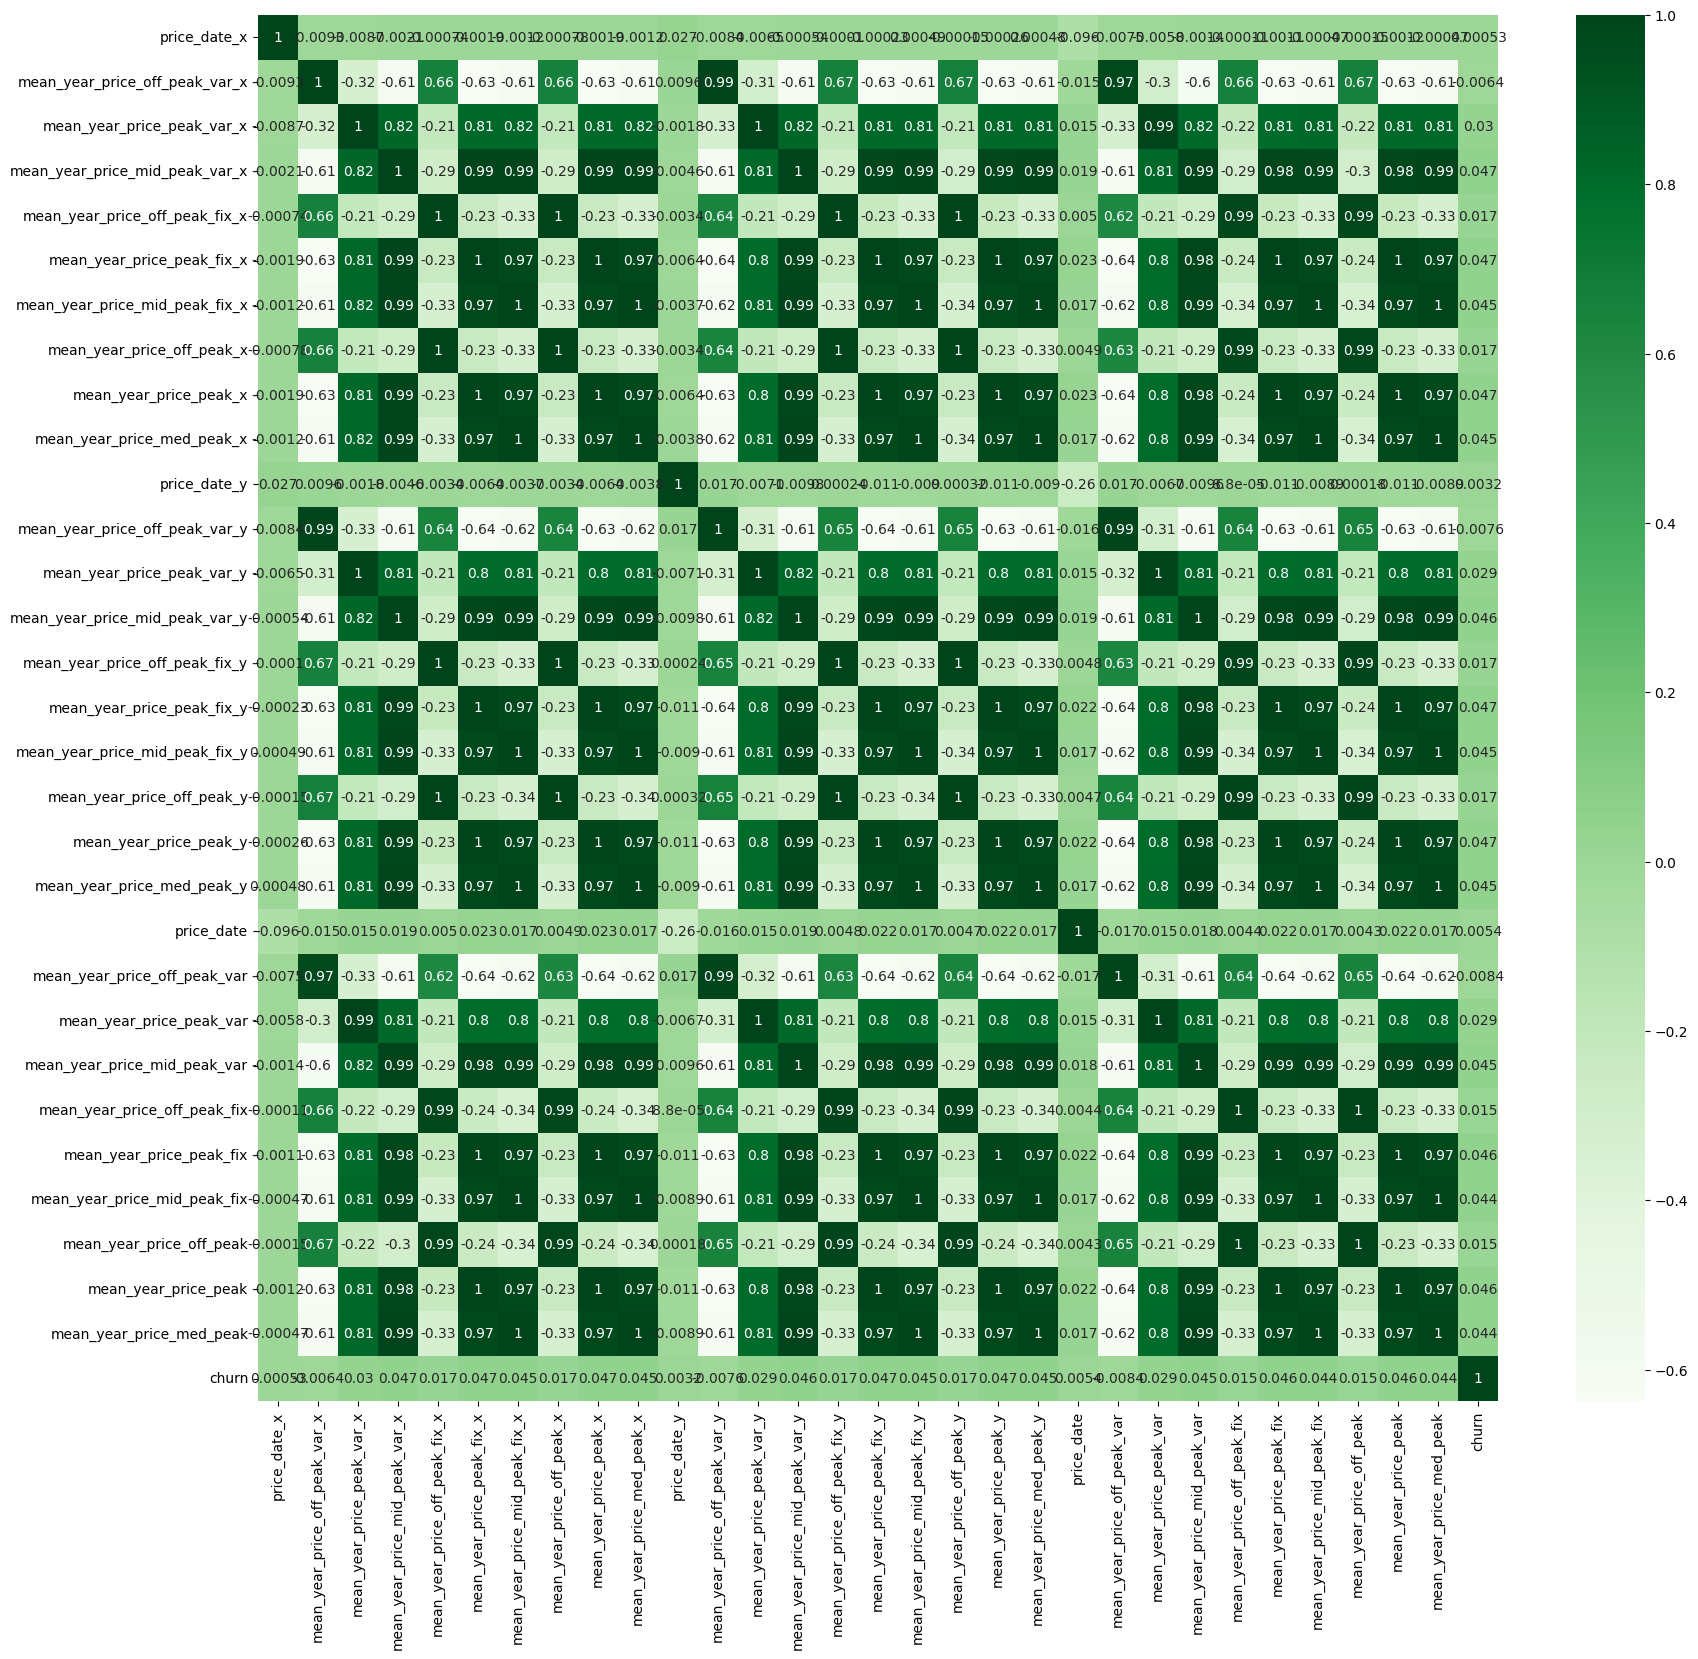

In [ ]:
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

# Assuming client_df is defined earlier and has 'id' and 'churn' columns
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')

# Drop the non-numeric 'id' column before calculating correlation
corr = price_churn.drop('id', axis=1).corr()

# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The above plot shows the correlation betweeen price variables with each other and with churn, however, the correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change.

Now, we will merge the client data with price churn data for modeling in the next move.

In [ ]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

In [ ]:
churn_data.to_csv('churn_data.csv', index=False)


Findings:

Approximately 10% of customers have churned

Consumption data is highly skewed and must be treated before modelling

There are outliers present in the data and these must be treated before modelling

Price sensitivity has a low correlation with churn

Feature engineering will be vital, especially if we are to increase the predictive power of price sensitivity

Suggestions:

Competitor price data - perhaps a client is more likely to churn if a competitor has a good offer available?

Average Utilities prices across the country - if PowerCo’s prices are way above or below the country average, will a client be likely to churn?

Client feedback - a track record of any complaints, calls or feedback provided by the client to PowerCo might reveal if a client is likely to churn